In [1]:
from pathlib import Path
import sys
sys.path.append('../')
from pma_open import *
from matplotlib.widgets import Cursor, Button

#My image
image_path = "hel1_Avg_Frame/hel1_Avg_Frame.png"
image = io.imread(image_path, as_gray=True)

#Image on dropbox
hel1_ave_path = '../Dropbox Files/hel1_ave_LF_Circ.tif'
hel1_ave_image = io.imread(hel1_ave_path)

#Testing avg_frame_arr function
file_path = '../Dropbox Files/hel1.pma'
avg_frame_data = avg_frame_arr(file_path)

#Chanel arrays
avg_frame_data_CH1 = avg_frame_data[:,:256]
avg_frame_data_CH2 = avg_frame_data[:,256:]

#Chanel image paths
CH1_img_path = "hel1_Avg_Frame/hel1_Avg_Frame_CH1.png"
CH2_img_path = "hel1_Avg_Frame/hel1_Avg_Frame_CH2.png"

#Chanel images
image_CH1 = io.imread(CH1_img_path, as_gray=True)
image_CH2 = io.imread(CH2_img_path, as_gray=True)

Image Size: 512 x 512
Sucessfully generated average frame


# Dropbox Images

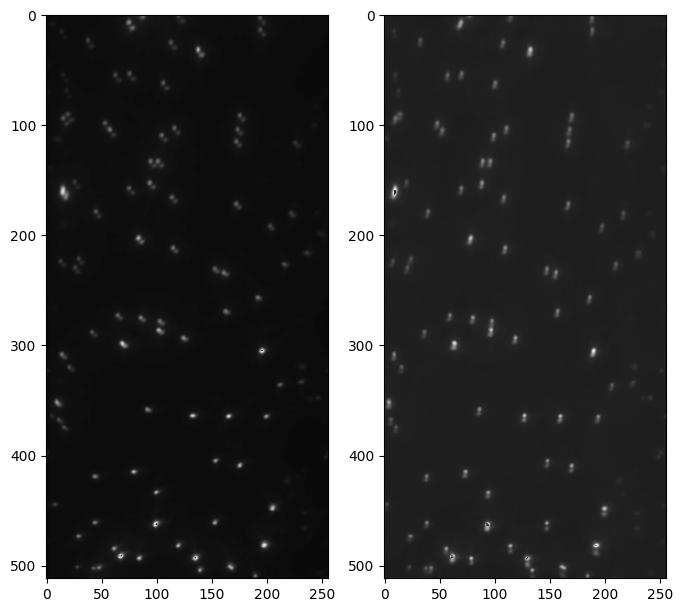

In [2]:
# Average frame, CH1 and CH2 overlayed
avg_overlayed = ((avg_frame_data_CH1 + avg_frame_data_CH2) / 2).astype(np.uint8)
Overlay_img_path = "hel1_Avg_Frame/hel1_Avg_Frame_Overlay.png"
overlay_img = io.imread(Overlay_img_path)

#Dropbox path
average_path_DB = "../Dropbox Files/hel1_ave_merged.tif"
average_DB_image = io.imread(average_path_DB)

f, axes = plt.subplots(1, 2, figsize=(8, 8))

axes[0].imshow(overlay_img, cmap="gray")
axes[1].imshow(average_DB_image, cmap="gray")
plt.show()


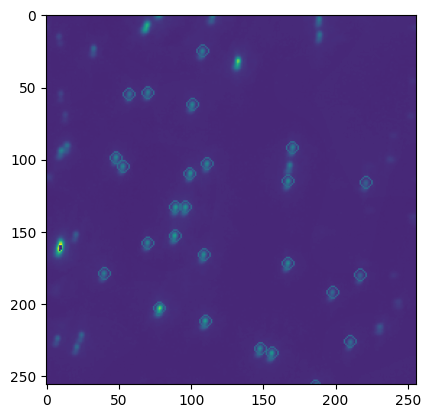

In [3]:
#Dropbox path to Top half of merged image circled!
average_circ_path_DB = "../Dropbox Files/hel1_ave_Merg_Circ.tif"
average_circ_DB_image = io.imread(average_circ_path_DB)
plt.imshow(average_circ_DB_image)
plt.show()

# Identified Peaks Displayed

Number of peaks identified in CH1: 57
Number of peaks identified in CH2: 68


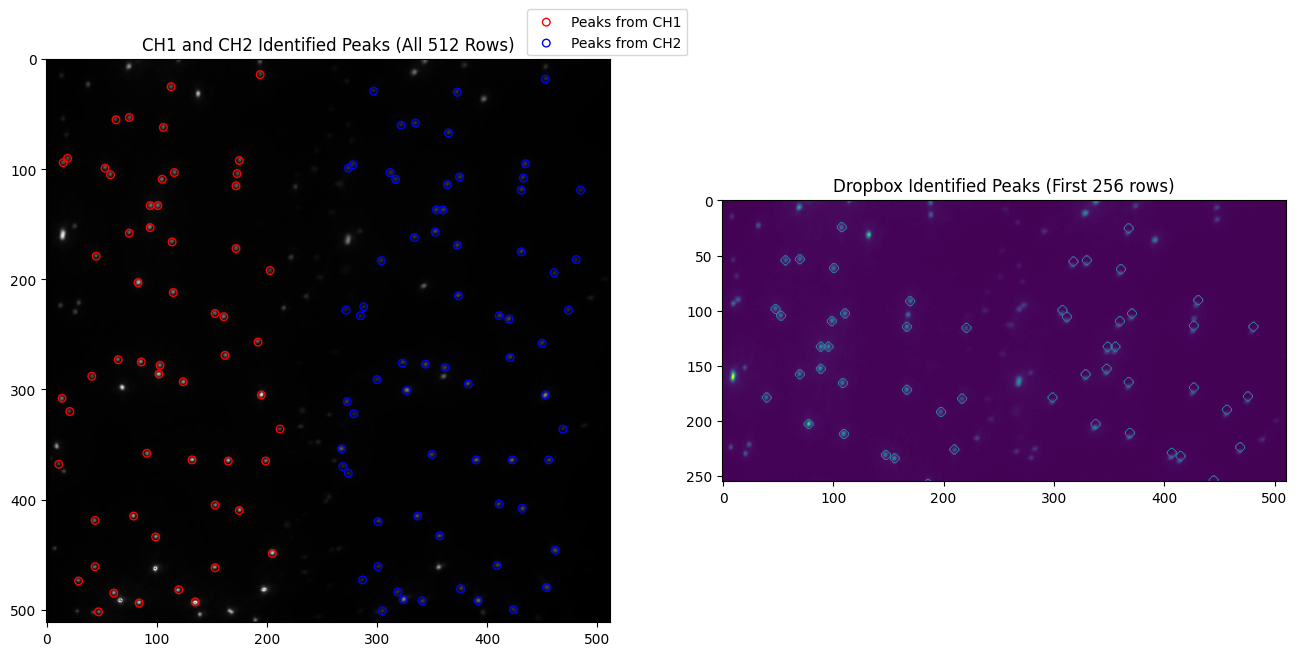

In [4]:
# Defining Variables
peaks_coords_IDL_CH1 = find_peaks_scipy_IDL(CH1_img_path)[0]
peaks_coords_IDL_CH2_new = find_peaks_scipy_IDL(CH2_img_path, sigma=2, block_size=16, scaler_percent=10)[0]

good_peaks_1,_ = good_peak_finder(CH1_img_path)
good_peaks_2_new,_ = good_peak_finder(CH2_img_path, sigma=2, block_size=16, scaler_percent=10, boarder=10, max_rad=3)


good_peaks_2_CH2 = shift_peaks(good_peaks_2_new)

#All in one image!
print(f"Number of peaks identified in CH1: {len(good_peaks_1)}")
print(f"Number of peaks identified in CH2: {len(good_peaks_2_CH2)}")

f, axes = plt.subplots(1, 2, figsize=(16, 24))
axes[0].set_title("CH1 and CH2 Identified Peaks (All 512 Rows)")
axes[0].imshow(image, cmap="gray")
scat1= axes[0].scatter(good_peaks_1[:, 1], good_peaks_1[:, 0], s=30, facecolors='none', edgecolors='r', label='Peaks from CH1')
scat2= axes[0].scatter(good_peaks_2_CH2[:, 1], good_peaks_2_CH2[:, 0], s=30, facecolors='none', edgecolors='b', label='Peaks from CH2')
axes[0].legend(loc='upper right', bbox_to_anchor=(1.15, 1.1))

axes[1].set_title("Dropbox Identified Peaks (First 256 rows)")
axes[1].imshow(hel1_ave_image)
plt.show()

# Polynomial Map from 10 Pairs

In [5]:
CH1_peaks_10 = np.array([[55,63], [14, 194], [179, 45], [115, 172], [273, 65], [257, 192], [358, 91], [365, 199], [419, 44], [445, 205]])
CH2_peaks_10 = np.array([[60, 322], [18, 453], [183, 304], [119, 431], [276, 323], [258, 450], [359, 350], [364, 456], [420, 301], [446, 462]])

params_x_man_10, params_y_man_10 = find_polyfit_params(CH1_peaks_10, CH2_peaks_10, degree=3)
mapped_peaks_10 = apply_polyfit_params(CH1_peaks_10, params_x_man_10, params_y_man_10).astype(np.uint16)

print("X-Mapping Parameters:", params_x_man_10)
print("Y-Mapping Parameters:", params_y_man_10)

X-Mapping Parameters: [-2.53605369e-06  6.11855853e-04  9.76124999e-01  2.58108366e+02]
Y-Mapping Parameters: [ 3.27648100e-07 -2.26245078e-04  1.02989737e+00  3.66879500e+00]


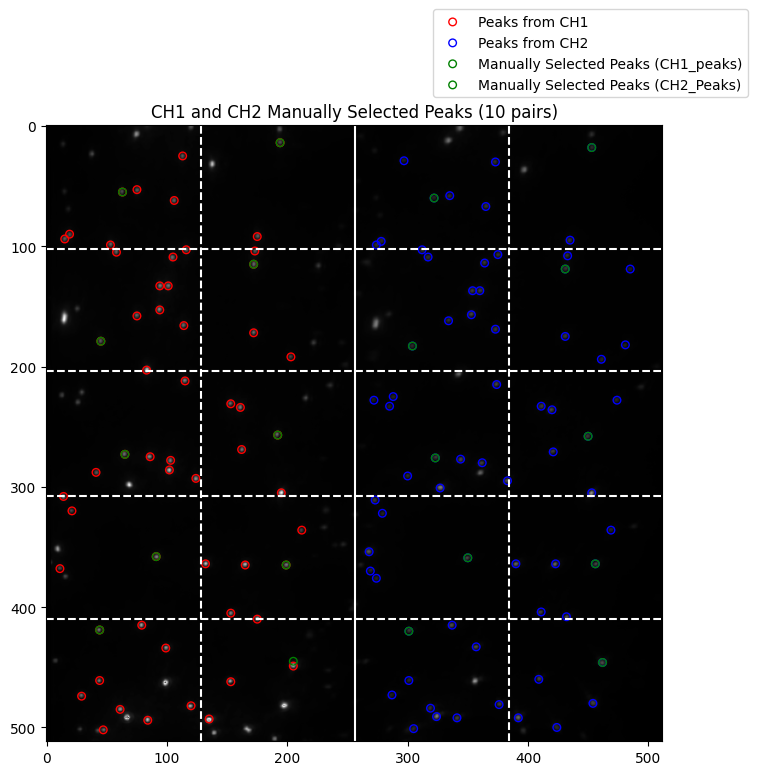

In [6]:
plt.figure(figsize=(8, 8))
plt.title("CH1 and CH2 Manually Selected Peaks (10 pairs)")
plt.imshow(image, cmap="gray")
plt.axhline(y= 102, color='w', linestyle='--')  
plt.axhline(y= 204, color='w', linestyle='--')
plt.axhline(y= 308, color='w', linestyle='--')
plt.axhline(y= 410, color='w', linestyle='--')

plt.axvline(x= 128, color='w', linestyle='--')
plt.axvline(x= 384, color='w', linestyle='--')

plt.axvline(x= 256, color='w', linestyle='-')
plt.scatter(good_peaks_1[:, 1], good_peaks_1[:, 0], s=30, facecolors='none', edgecolors='r', label='Peaks from CH1')
plt.scatter(good_peaks_2_CH2[:, 1], good_peaks_2_CH2[:, 0], s=30, facecolors='none', edgecolors='b', label='Peaks from CH2')
plt.scatter(CH1_peaks_10[:, 1], CH1_peaks_10[:, 0], s=30, facecolors='none', edgecolors='g', label='Manually Selected Peaks (CH1_peaks)')
plt.scatter(CH2_peaks_10[:, 1], CH2_peaks_10[:, 0], s=30, facecolors='none', edgecolors='g', label='Manually Selected Peaks (CH2_Peaks)')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1.2))

plt.show()

In [7]:
# tolerance = 4
poly_pair_count_tol4_10, poly_pair_arr_CH1_tol4_10, poly_pair_arr_CH2_tol4_10 = find_polyfit_pairs(mapped_peaks_10, good_peaks_1, tolerance=4)

print(f"Number of Polynomial pairs (tolerance=4): {poly_pair_count_tol4_10}")

Number of Polynomial pairs (tolerance=4): 10


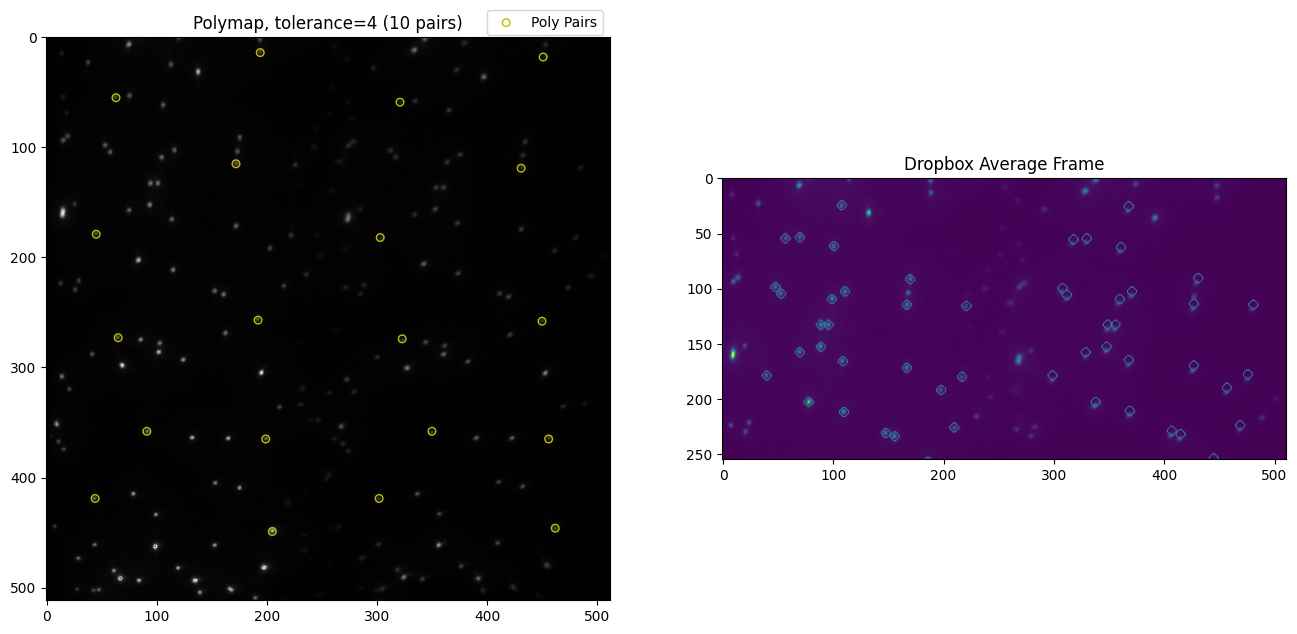

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(16, 48))
axes[0].imshow(image, cmap="gray")
axes[0].set_title(f"Polymap, tolerance=4 ({poly_pair_count_tol4_10} pairs)")
# axes[0].scatter(good_peaks_1[:, 1], good_peaks_1[:, 0], s=50, facecolors='none', edgecolors='r', label='Peaks from CH1')
# axes[0].scatter(good_peaks_2_CH2[:, 1], good_peaks_2_CH2[:, 0], s=50, facecolors='none', edgecolors='b', label='Peaks from CH2')
axes[0].scatter(poly_pair_arr_CH1_tol4_10[:, 1], poly_pair_arr_CH1_tol4_10[:, 0], s=30, facecolors='none', edgecolors='y', label='Poly Pairs')
axes[0].scatter(poly_pair_arr_CH2_tol4_10[:, 1], poly_pair_arr_CH2_tol4_10[:, 0], s=30, facecolors='none', edgecolors='y')
axes[0].legend(loc='upper right', bbox_to_anchor=(1.0, 1.06))

axes[1].imshow(hel1_ave_image)
axes[1].set_title("Dropbox Average Frame")
plt.show()


# Overlay Channels 

In [9]:
poly_pair_arr_CH2_tol4_10_CH1 = shift_peaks(poly_pair_arr_CH2_tol4_10, [0, -256])
mapped_peaks_10_CH1 = shift_peaks(mapped_peaks_10, [0, -256])

shift = [1, -1]
tolerance=4
good_peaks_2_shift = shift_peaks(good_peaks_2_new, shift=shift)

found_pairs_noshift_count, found_pairs_noshift,_ = find_linear_pairs(good_peaks_1, good_peaks_2_new, tolerance=tolerance, width=256)
found_pairs_shift_count, found_pairs_shift,_= find_linear_pairs(good_peaks_1, good_peaks_2_shift, tolerance=tolerance, width=256)

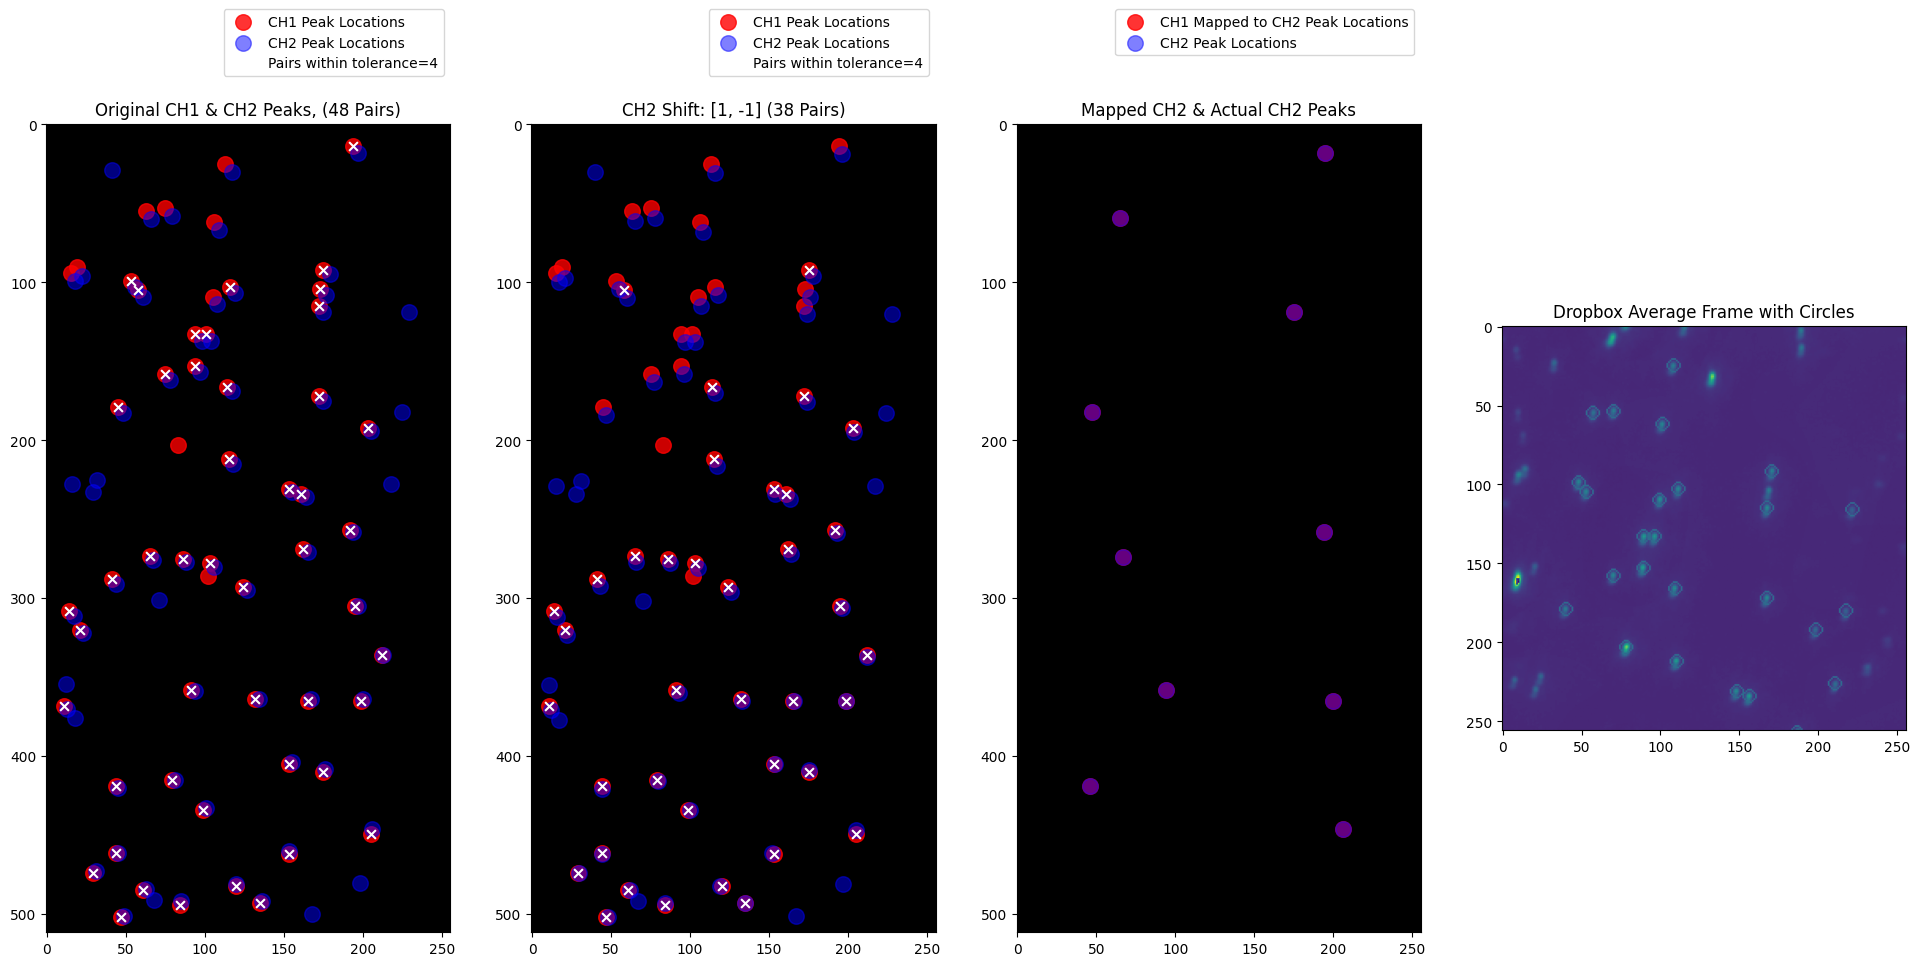

In [10]:
fig, axes = plt.subplots(1,4, figsize=(24, 24))


axes[0].imshow(np.zeros_like(overlay_img), cmap="gray")
axes[0].scatter(good_peaks_1[:, 1], good_peaks_1[:, 0], s=500, marker= ".", alpha=0.8, color='r', label='CH1 Peak Locations')
axes[0].scatter(good_peaks_2_new[:, 1], good_peaks_2_new[:, 0], s=500, marker=".", alpha=0.5, color='b', label='CH2 Peak Locations')
axes[0].scatter(found_pairs_noshift[:,1], found_pairs_noshift[:,0], s=40, marker="x", color='w', label=f'Pairs within tolerance={tolerance}')
axes[0].set_title(f"Original CH1 & CH2 Peaks, ({found_pairs_noshift_count} Pairs)")
axes[0].legend(loc='upper right', bbox_to_anchor=(1, 1.15))

axes[1].imshow(np.zeros_like(overlay_img), cmap="gray")
axes[1].scatter(good_peaks_1[:, 1], good_peaks_1[:, 0], s=500, marker= ".", alpha=0.8, color='r', label='CH1 Peak Locations')
axes[1].scatter(good_peaks_2_shift[:, 1], good_peaks_2_shift[:, 0], s=500, marker=".", alpha=0.5, color='b', label='CH2 Peak Locations')
axes[1].scatter(found_pairs_shift[:,1], found_pairs_shift[:,0], s=40, marker="x", color='w', label=f'Pairs within tolerance={tolerance}')
axes[1].set_title(f"CH2 Shift: {shift} ({found_pairs_shift_count} Pairs)")
axes[1].legend(loc='upper right', bbox_to_anchor=(1, 1.15))

axes[2].imshow(np.zeros_like(overlay_img), cmap="gray")
axes[2].scatter(mapped_peaks_10_CH1[:, 1], mapped_peaks_10_CH1[:, 0], s=500, marker= ".", alpha=0.8, color='r', label='CH1 Mapped to CH2 Peak Locations')
axes[2].scatter(poly_pair_arr_CH2_tol4_10_CH1[:, 1], poly_pair_arr_CH2_tol4_10_CH1[:, 0], s=500, marker=".", alpha=0.5, color='b', label='CH2 Peak Locations')
axes[2].set_title(f"Mapped CH2 & Actual CH2 Peaks")
axes[2].legend(loc='upper right', bbox_to_anchor=(1, 1.15))


axes[3].imshow(average_circ_DB_image)
axes[3].set_title("Dropbox Average Frame with Circles")
plt.show()
